# Now we will learn About 
#### 1: Standardization 
#### 2: Normalization
#### 3: Ordinal Encoding
#### 4: Label Encoding
#### 5: OneHot Encoding
#### 6: Column Transformer

# Standardization

#### Standardization (also called Z-score normalization) rescales data so that it has a mean of 0 and a standard deviation of 1. The formula for standardization is:

$$
  z= x−μ/σ
$$
​
Where:

##### x is the original feature value.
##### μ is the mean of the feature.
##### σ is the standard deviation of the feature.

### When to Use Standardization?
#### Standardization is recommended when:

##### The data has large variations in feature ranges.
##### Algorithms such as logistic regression, SVMs, or neural networks are being used, which are sensitive to the magnitude of features.
##### Features are normally distributed (though not a strict requirement).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("D:\\Machine learning\\DataSets\\tip.csv")
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [3]:
df = df.iloc[:,:3]
df.sample(5)

,total_bill,tip,sex
226,10.09,2.00,Female
227,20.45,3.00,Male
150,14.07,2.50,Male
116,29.93,5.07,Male
27,12.69,2.00,Male


In [4]:
# first replace sex column
df["sex"].replace({"Male": 1, "Female": 0}, inplace=True)

df[["total_bill"]].shape
df["tip"].shape

C:\Users\Abdullah khan\AppData\Local\Temp\ipykernel_5152\4270725599.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["sex"].replace({"Male": 1, "Female": 0}, inplace=True)
C:\Users\Abdullah khan\AppData\Local\Temp\ipykernel_5152\4270725599.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df

(244,)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df.drop("sex", axis=1), df[["sex"]],test_size=0.3, random_state=0)
# X_train, X_test, y_train, y_test = train_test_split(df[["total_bill"]], df["tip"],test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((170, 2), (74, 2))

In [6]:
scalar = StandardScaler()
scalar.fit(X_train)
print(scalar.mean_)

X_train_scaled = scalar.transform(X_train)   # We learn form this train dataset
X_test_scaled = scalar.transform(X_test)    # But we also transform test set to standard scalar

[20.03111765  2.96429412]


In [7]:
# Converting numpy array to dataframe
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)

X_train_scaled 
# X_test_scaled       # Here you can see all the values are totally scalled

,total_bill,tip
0,-0.682321,-0.685021
1,-0.152575,-1.139668
2,1.620922,1.588214
3,-0.392771,-0.351140
4,-0.730580,-0.685021
...,...,...
165,-1.860266,-1.395407
166,0.922272,-0.287205
167,-1.028905,-1.040214
168,1.356598,2.156523


In [8]:
# Let's see there mathimatical insights are analysis
round(X_train_scaled.describe(),2)
# round(X_test_scaled.describe(),2)


# The original data might have a wider spread (e.g., the total_bill or tip values), so after standardization, values 
# may lie outside the typical range of -3 to +3 depending on how far they deviate from the mean.
# If you want values within a fixed range (like 0 to 1), consider using Min-Max scaling instead of standardization:

,total_bill,tip
count,170.00,170.00
mean,-0.00,0.00
std,1.00,1.00
min,-1.86,-1.40
25%,-0.75,-0.69
50%,-0.22,-0.17
75%,0.44,0.38
max,3.38,5.00


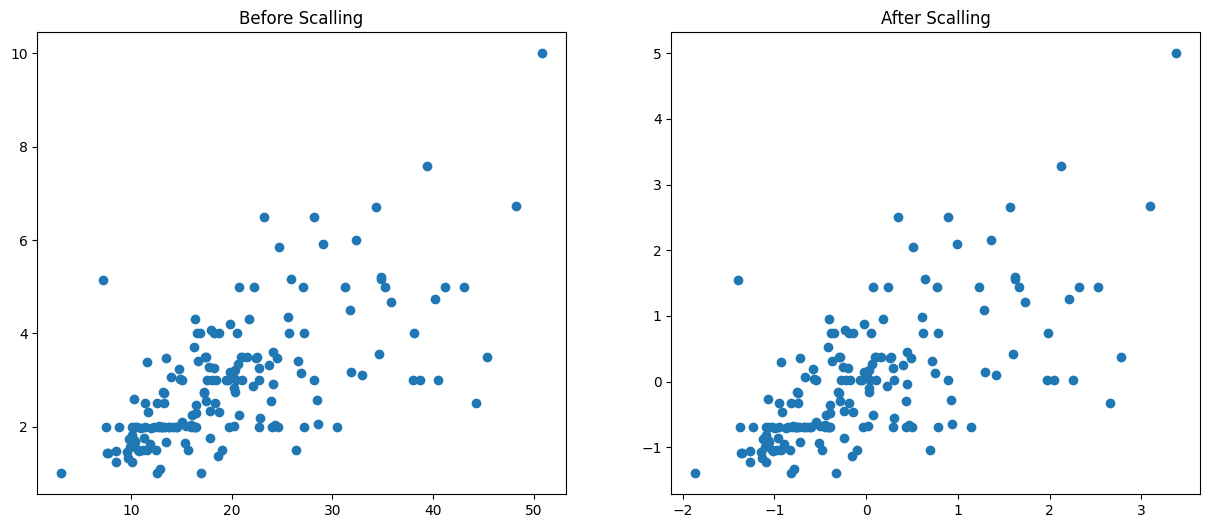

In [9]:
# Before and after effects 
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize = (15,6))
ax1.scatter(X_train["total_bill"], X_train["tip"])
ax1.set_title("Before Scalling")
ax2.scatter(X_train_scaled["total_bill"], X_train_scaled["tip"])
ax2.set_title("After Scalling")
plt.show()

# Normalization

#### Types of scalling
##### 1: MinMax Scalling
##### 2: Mean Normalization
##### 3: Max Absolute
##### 4: Robust scalling

###### It will sequse the data into [0,1] range

## MinMax Scalar

In [10]:
from sklearn.preprocessing import MinMaxScaler

# Load the tips dataset
df = pd.read_csv('D:\\Machine learning\\DataSets\\tip.csv')
# Or use buildin dataset
# df = sns.load_dataset("tips")

# Selecting a few numeric columns
numeric_cols = ['total_bill', 'tip', 'size']
# first replace sex column
df.iloc[:,[0,1,6]]

df["sex"].replace({"Male": 1, "Female": 0}, inplace=True)

df[["total_bill"]].shape
df["tip"].shape

C:\Users\Abdullah khan\AppData\Local\Temp\ipykernel_5152\1506316059.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["sex"].replace({"Male": 1, "Female": 0}, inplace=True)
C:\Users\Abdullah khan\AppData\Local\Temp\ipykernel_5152\1506316059.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  

(244,)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df.drop("size", axis=1), df[["size"]],test_size=0.3, random_state=0)

In [12]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[numeric_cols])
scaled_df = pd.DataFrame(scaled_data, columns=numeric_cols)
print(scaled_df.head())
print(scaled_df.describe())

   total_bill       tip  size
0    0.291579  0.001111   0.2
1    0.152283  0.073333   0.4
2    0.375786  0.277778   0.4
3    0.431713  0.256667   0.2
4    0.450775  0.290000   0.6
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean     0.350145    0.222031    0.313934
std      0.186477    0.153738    0.190220
min      0.000000    0.000000    0.000000
25%      0.215281    0.111111    0.200000
50%      0.308442    0.211111    0.200000
75%      0.441087    0.284722    0.400000
max      1.000000    1.000000    1.000000


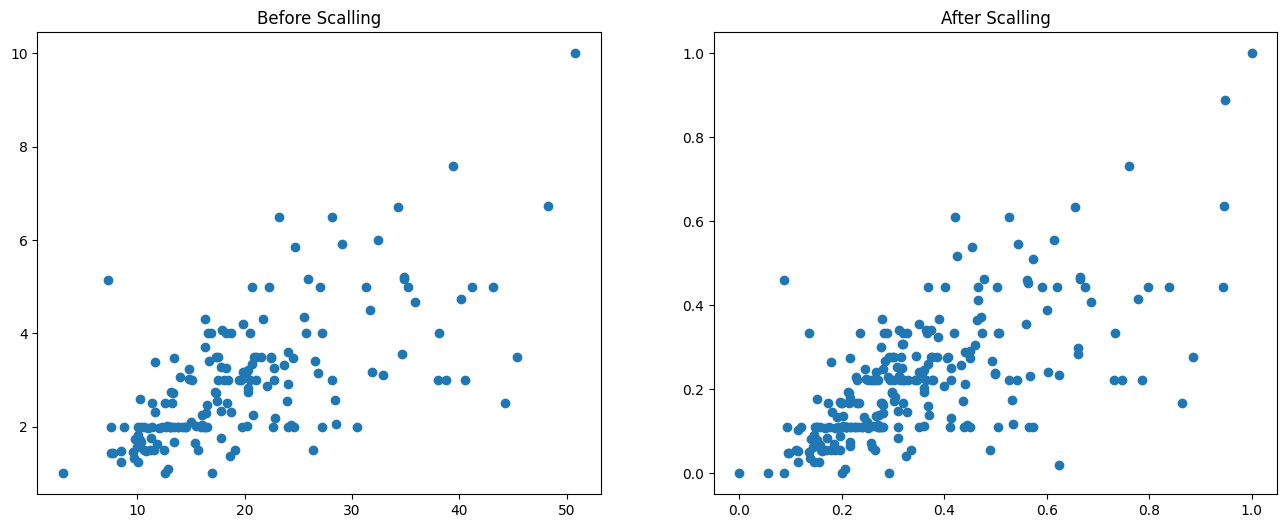

In [13]:
# Before and after effects 
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (16,6))
ax1.scatter(X_train["total_bill"], X_train["tip"])
ax1.set_title("Before Scalling")
ax2.scatter(scaled_df["total_bill"], scaled_df["tip"])
ax2.set_title("After Scalling")
plt.show()


# In down plots you can clearly see the difference between the standard scalar and min-max scalar 
# the min-max set boundries from 0 to 1 
# In Kde plot you can actually see the difference between the two scalars

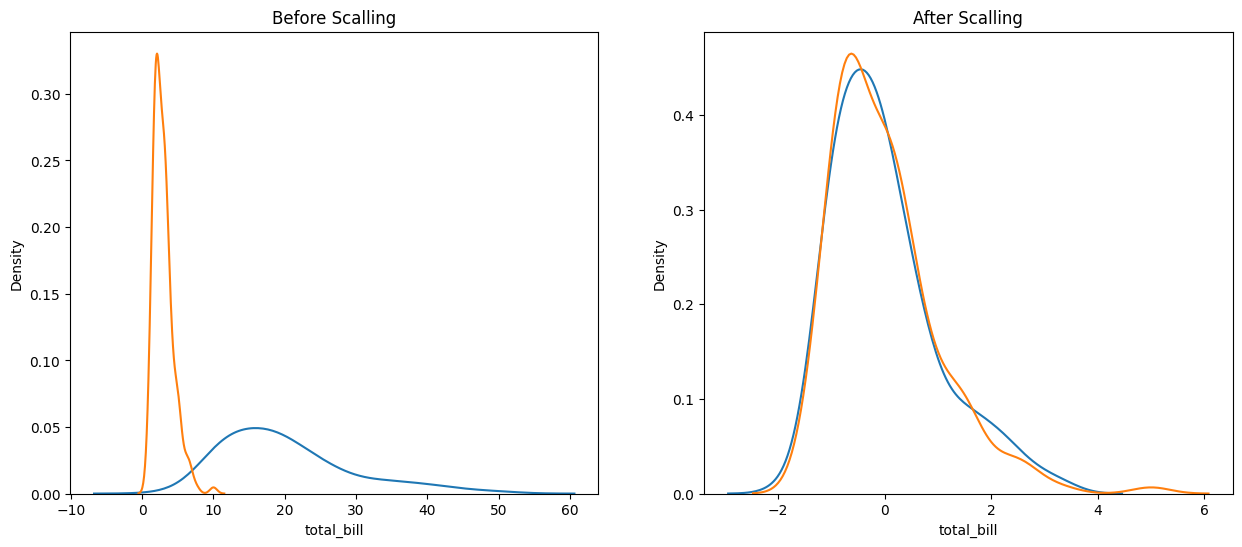

In [14]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize = (15,6))

ax1.set_title("Before Scalling")
sns.kdeplot(X_train["total_bill"], ax= ax1)
sns.kdeplot(X_train["tip"], ax = ax1)
ax2.set_title("After Scalling")
sns.kdeplot(X_train_scaled["total_bill"], ax= ax2)
sns.kdeplot(X_train_scaled["tip"], ax = ax2)
plt.show()


# Before the tip was in range between 0-12 and bill was in range between 0-60 but after the scalling the range is between 0-1 for both scales

##### You can also visulize all these plots separatly for both tip and total bill individually

## Example 

In [15]:
from sklearn.datasets import fetch_california_housing

# Load the California housing dataset
california = fetch_california_housing()

# Create a DataFrame
df_california = pd.DataFrame(california.data, columns=california.feature_names)
df_california['MedHouseVal'] = california.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_california.drop('MedHouseVal', axis=1), df_california['MedHouseVal'], test_size=0.3, random_state=0)

df_california.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [16]:
import scipy.stats as stats

# for col in X_train.columns:
#     plt.figure(figsize=(14,4))
#     plt.subplot(121)
#     sns.histplot(X_train[col], kde=True)
#     plt.title(col)
    
#     plt.subplot(122)
#     stats.probplot(X_train[col],dist = "norm",plot=plt)
#     plt.title(col)
#     plt.show()

In [17]:
# Lets apply both standardization and normalization to the California housing dataset

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Standardization
scalar_std = StandardScaler()
X_train_std = scalar_std.fit_transform(X_train)
X_test_std = scalar_std.transform(X_test)

# Normalization
scalar_norm = MinMaxScaler()
X_train_norm = scalar_norm.fit_transform(X_train)
X_test_norm = scalar_norm.transform(X_test)

# Train Linear Regression on Standardized Data
model_std = LinearRegression()
model_std.fit(X_train_std, y_train)
y_pred_std = model_std.predict(X_test_std)

# Train Linear Regression on Normalized Data
model_norm = LinearRegression()
model_norm.fit(X_train_norm, y_train)
y_pred_norm = model_norm.predict(X_test_norm)

# Compare Errors
print("MSE (Standardization):", mean_squared_error(y_test, y_pred_std))
print("MSE (Normalization):", mean_squared_error(y_test, y_pred_norm))

MSE (Standardization): 0.5431489670037237
MSE (Normalization): 0.5431489670037237


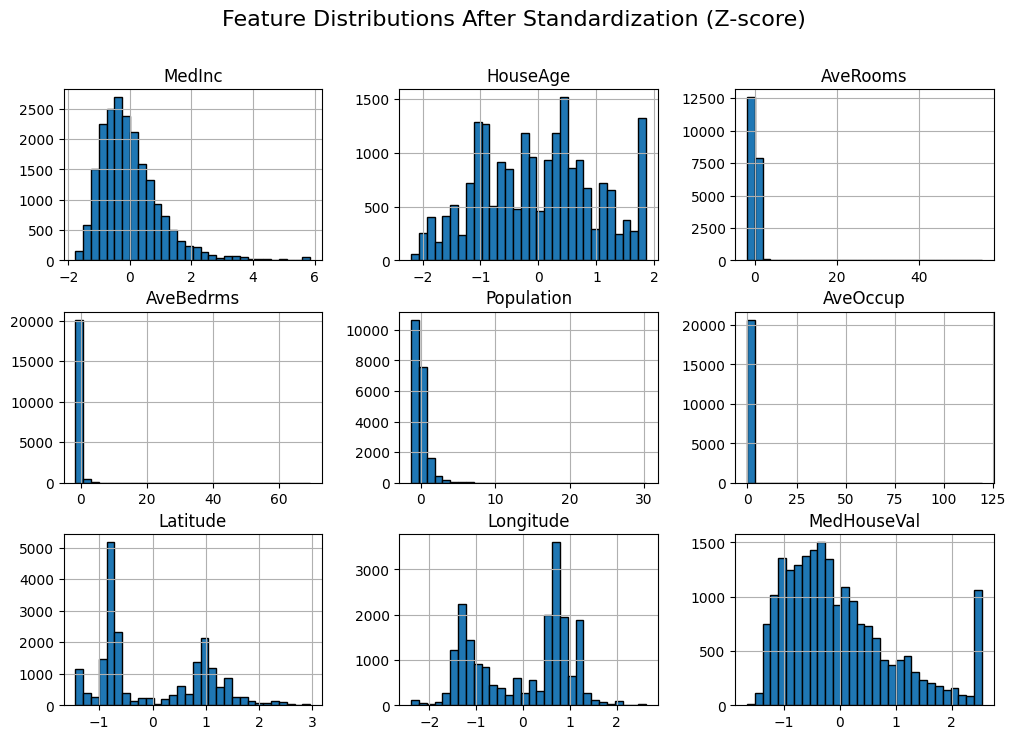

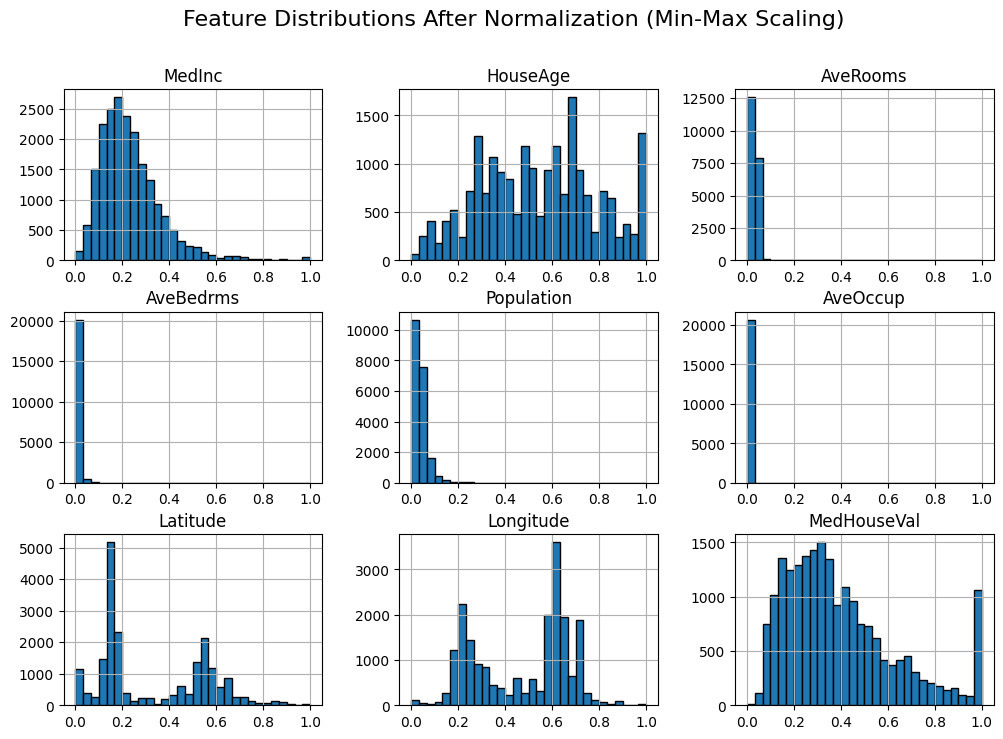

In [23]:
from sklearn.datasets import fetch_california_housing

# Load the California housing dataset
california = fetch_california_housing()

# Create a DataFrame
df_california = pd.DataFrame(california.data, columns=california.feature_names)
df_california['MedHouseVal'] = california.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_california.drop('MedHouseVal', axis=1), df_california['MedHouseVal'], test_size=0.3, random_state=0)

# df_california.head()

scaler_standard = StandardScaler()
df_standardized = pd.DataFrame(scaler_standard.fit_transform(df_california), columns=df_california.columns)

# Plot histograms after standardization
df_standardized.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions After Standardization (Z-score)", fontsize=16)
plt.show()

scaler_minmax = MinMaxScaler()
df_normalized = pd.DataFrame(scaler_minmax.fit_transform(df_california), columns=df_california.columns)

# Plot histograms after normalization
df_normalized.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions After Normalization (Min-Max Scaling)", fontsize=16)
plt.show()